In [94]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [95]:
markers = {
# T cells
"t_cell_markers": ["CD3D", "CD3E", "CD3G", "CD4", "CD8A", "CD8B", "IL7R", "CCR7"],

# B cells
"b_cell_markers": ["MS4A1", "CD19", "CD79A"],

# NK cells
"nk_cell_markers": ["NKG7", "GNLY", "KLRD1", "NCAM1", "FCGR3A"],

# Monocytes
"monocyte_markers": ["CD14", "LYZ", "FCN1", "FCGR3A"],

# Dendritic cells
"dendritic_cell_markers": ["FCER1A", "CLEC9A", "BATF3", "IRF8", "CD1C"],

# Megakaryocytes / Platelets
"megakaryocyte_markers": ["PPBP", "PF4", "ITGA2B", "GP1BA"]
}

In [96]:
DIR="/vast/scratch/users/mueller.h/hackathon"
#source("/Users/harrisonm/data/WEHI/Conferences/OZSC_Hackathon/scripts/st_python/r/utils.R")
#source("/Users/harrisonm/data/WEHI/Conferences/OZSC_Hackathon/scripts/st_python/r/transfer.R")
OUTDIR = os.path.join(DIR, "scripts/hackathon_multiomic_embeddings/results")


In [48]:
dat = pd.read_csv(os.path.join(OUTDIR, "rna", "edger.csv"))
dat = dat[~dat["pca"].isna()] # remove na

dat.shape

(25620, 3)

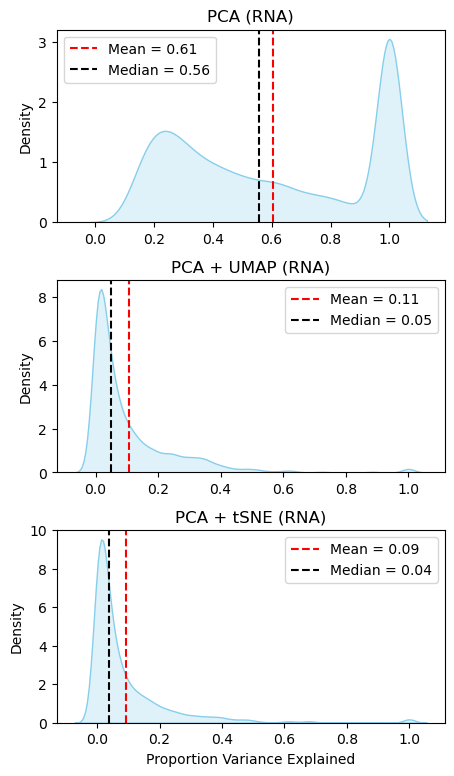

In [40]:
dat = pd.read_csv(os.path.join(OUTDIR, "rna", "edger.csv"))
dat = dat[~dat["pca"].isna()] # remove na

n = dat.shape[1]
titles = {
    "pca": "PCA",
    "pca_umap": "PCA + UMAP",
    "pca_tsne": "PCA + tSNE"
}
fig,ax = plt.subplots(n,1,figsize=(5,3*n))
plt.subplots_adjust(hspace = 0.3)
for i,col in enumerate(dat.columns):
    # Compute mean
    mean_val = np.mean(dat[col])
    med_val = np.median(dat[col])

    # Plot density
    sns.kdeplot(dat[col], fill=True, color="skyblue", ax=ax[i])
    ax[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')
    ax[i].axvline(med_val, color='black', linestyle='--', label=f'Median = {med_val:.2f}')

    # Add legend and labels
    ax[i].set_title(f'{titles[col]} (RNA)')
    ax[i].set_xlabel("Proportion Variance Explained" if i == (n-1) else None)
    ax[i].set_ylabel("Density")
    ax[i].legend()

plt.show()
fig.savefig(os.path.join(OUTDIR, "rna", "edger_plot_rna.png"), dpi=300, bbox_inches='tight')

In [103]:
dat = pd.read_csv(os.path.join(OUTDIR, "atac", "edger_frag.csv"))
dat = dat[~dat["lsi"].isna()] # remove na

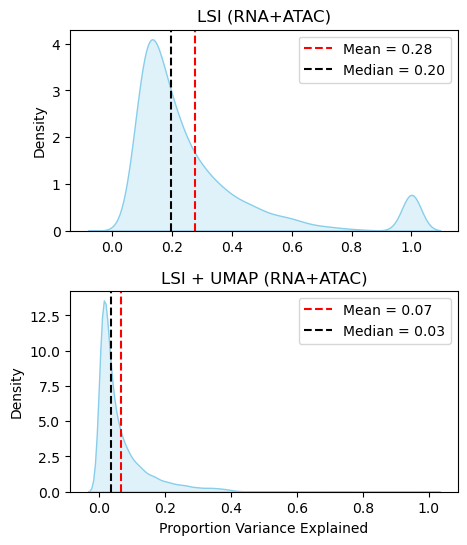

In [105]:
dat = pd.read_csv(os.path.join(OUTDIR, "atac", "edger_frag.csv"))
dat = dat[~dat["lsi"].isna()] # remove na

n = dat.shape[1]
titles = {
    "lsi": "LSI",
    "lsi_umap": "LSI + UMAP"
}
fig,ax = plt.subplots(n,1,figsize=(5,3*n))
plt.subplots_adjust(hspace = 0.3)
for i,col in enumerate(dat.columns):
    # Compute mean
    mean_val = np.mean(dat[col])
    med_val = np.median(dat[col])

    # Plot density
    sns.kdeplot(dat[col], fill=True, color="skyblue", ax=ax[i])
    ax[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')
    ax[i].axvline(med_val, color='black', linestyle='--', label=f'Median = {med_val:.2f}')

    # Add legend and labels
    ax[i].set_title(f'{titles[col]} (RNA+ATAC)')
    ax[i].set_xlabel("Proportion Variance Explained" if i == (n-1) else None)
    ax[i].set_ylabel("Density")
    ax[i].legend()

plt.show()
fig.savefig(os.path.join(OUTDIR, "rna", "edger_plot_rna.png"), dpi=300, bbox_inches='tight')

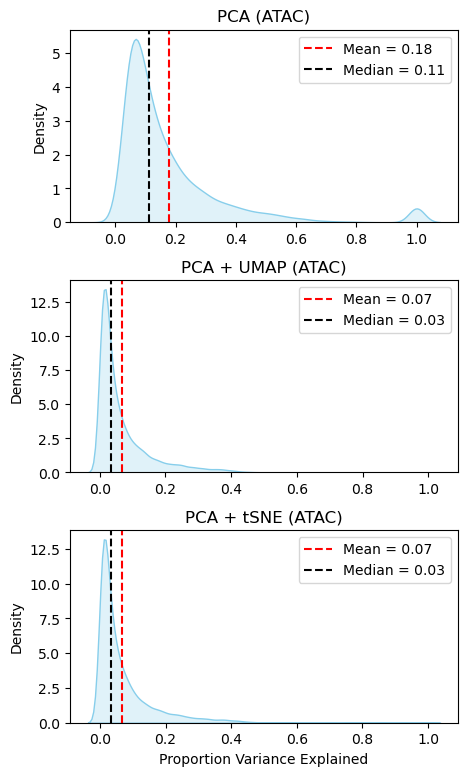

In [41]:
dat = pd.read_csv(os.path.join(OUTDIR, "atac", "edger.csv"))
dat = dat[~dat["pca"].isna()] # remove na

n = dat.shape[1]
titles = {
    "pca": "PCA",
    "pca_umap": "PCA + UMAP",
    "pca_tsne": "PCA + tSNE"
}
fig,ax = plt.subplots(n,1,figsize=(5,3*n))
plt.subplots_adjust(hspace = 0.3)
for i,col in enumerate(dat.columns):
    # Compute mean
    mean_val = np.mean(dat[col])
    med_val = np.median(dat[col])

    # Plot density
    sns.kdeplot(dat[col], fill=True, color="skyblue", ax=ax[i])
    ax[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean = {mean_val:.2f}')
    ax[i].axvline(med_val, color='black', linestyle='--', label=f'Median = {med_val:.2f}')

    # Add legend and labels
    ax[i].set_title(f'{titles[col]} (ATAC)')
    ax[i].set_xlabel("Proportion Variance Explained" if i == (n-1) else None)
    ax[i].set_ylabel("Density")
    ax[i].legend()

plt.show()
fig.savefig(os.path.join(OUTDIR, "atac", "edger_plot_atac.png"), dpi=300, bbox_inches='tight')

## which genes have high variance explained

In [88]:
modality = "atac"
dat = pd.read_csv(os.path.join(OUTDIR, modality, "edger.csv"))
cellxgene = pd.read_csv(os.path.join(DIR, "scripts", f"{modality}_cellgene.csv"), index_col = 0)

In [91]:
dat.index = cellxgene.index

In [92]:
new = dat[np.any(dat>0.95,axis=1)]
new.to_csv(os.path.join(OUTDIR, modality, f"{modality}_high_prop.csv"))
new.head()

,pca,pca_umap,pca_tsne
VCX,1.0,0.048498,0.009966
VCX2,1.0,0.154886,0.329049
VCX3B,1.0,0.031071,0.082389
CLDN34,1.0,0.227195,0.136313
CBLL2,1.0,0.149445,0.117079


In [93]:
with open(os.path.join(OUTDIR, modality, f"{modality}_high_prop_genes.txt"), "w") as f:
    for ct, genes in markers.items():
        m = np.isin(new.index, genes)
        if np.count_nonzero(m) > 0:
            f.write(f'{ct}: {"".join(list(new.index[m]))}\n')